In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
path = "/home/unix/sjohri/valab_sjohri/projects/methods/testing_parameters/melanoma-tirosh/results=251-vision-C2-CP-KEGG/"
de_summary_all_vision_hallmark = []
for i in range(0,16):
    de_summary_all_vision_hallmark.append(pd.read_csv(path+str(i)+"/de_summary_all.csv", index_col=0))

In [5]:
df = de_summary_all_vision_hallmark[15][(de_summary_all_vision_hallmark[15].nonrobust==True) & (de_summary_all_vision_hallmark[15].p<=0.05)]
df_plot = df.iloc[:,3:(df.shape[1]-1)]
size=50
df_plot = df_plot.iloc[:size,:]
df_plot

,excluded_Mel102,excluded_Mel103,excluded_Mel105,excluded_Mel106,excluded_Mel110,excluded_Mel112,excluded_Mel121.1,excluded_Mel128,excluded_Mel129pa,excluded_Mel194,...,excluded_Mel78,excluded_Mel79,excluded_Mel80,excluded_Mel81,excluded_Mel82,excluded_Mel84,excluded_Mel88,excluded_Mel89,excluded_Mel94,excluded_Mel98
KEGG_GAP_JUNCTION,1.008400,1.008400,1.008400,1.008400,0.816733,1.008400,1.008400,1.008400,1.008400,1.008400,...,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400,1.008400
KEGG_HOMOLOGOUS_RECOMBINATION,1.008769,1.008769,1.008769,1.008769,0.808765,1.008769,1.008769,1.008769,1.008769,1.008769,...,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769,1.008769
KEGG_OOCYTE_MEIOSIS,1.046031,1.046031,1.046031,1.046031,0.031873,1.046031,1.046031,1.046031,1.046031,1.046031,...,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031,1.046031
KEGG_HUNTINGTONS_DISEASE,1.050809,0.980839,1.050809,1.050809,0.000000,1.050809,1.050809,1.050809,1.050809,1.050809,...,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809,1.050809
KEGG_GLYCOLYSIS_GLUCONEOGENESIS,1.065406,1.065406,1.065406,0.858126,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,...,1.065406,0.853756,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,1.065406,0.028377
KEGG_GLUTATHIONE_METABOLISM,1.038946,1.038946,1.038946,1.038946,0.345255,1.038946,1.038946,1.038946,1.038946,1.038946,...,1.038946,1.038946,1.038946,1.012967,1.038946,1.038946,1.038946,1.038946,1.038946,0.883947
KEGG_MISMATCH_REPAIR,1.047619,1.047619,1.047619,1.047619,0.000000,1.047619,1.047619,1.047619,1.047619,1.047619,...,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619,1.047619
KEGG_P53_SIGNALING_PATHWAY,1.105727,1.105727,1.105727,1.105727,0.004195,1.105727,1.105727,1.105727,0.050449,1.105727,...,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,1.105727,0.940358
KEGG_CARDIAC_MUSCLE_CONTRACTION,1.089686,0.141908,1.127399,0.453518,0.000000,1.127399,1.127399,1.127399,1.127399,1.127399,...,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399,1.127399
KEGG_DNA_REPLICATION,1.054018,1.054018,1.054018,1.049618,0.000000,1.054018,1.054018,1.054018,1.054018,1.054018,...,1.054018,0.935815,1.054018,1.054018,1.054018,1.054018,1.054018,1.036430,1.054018,1.054018


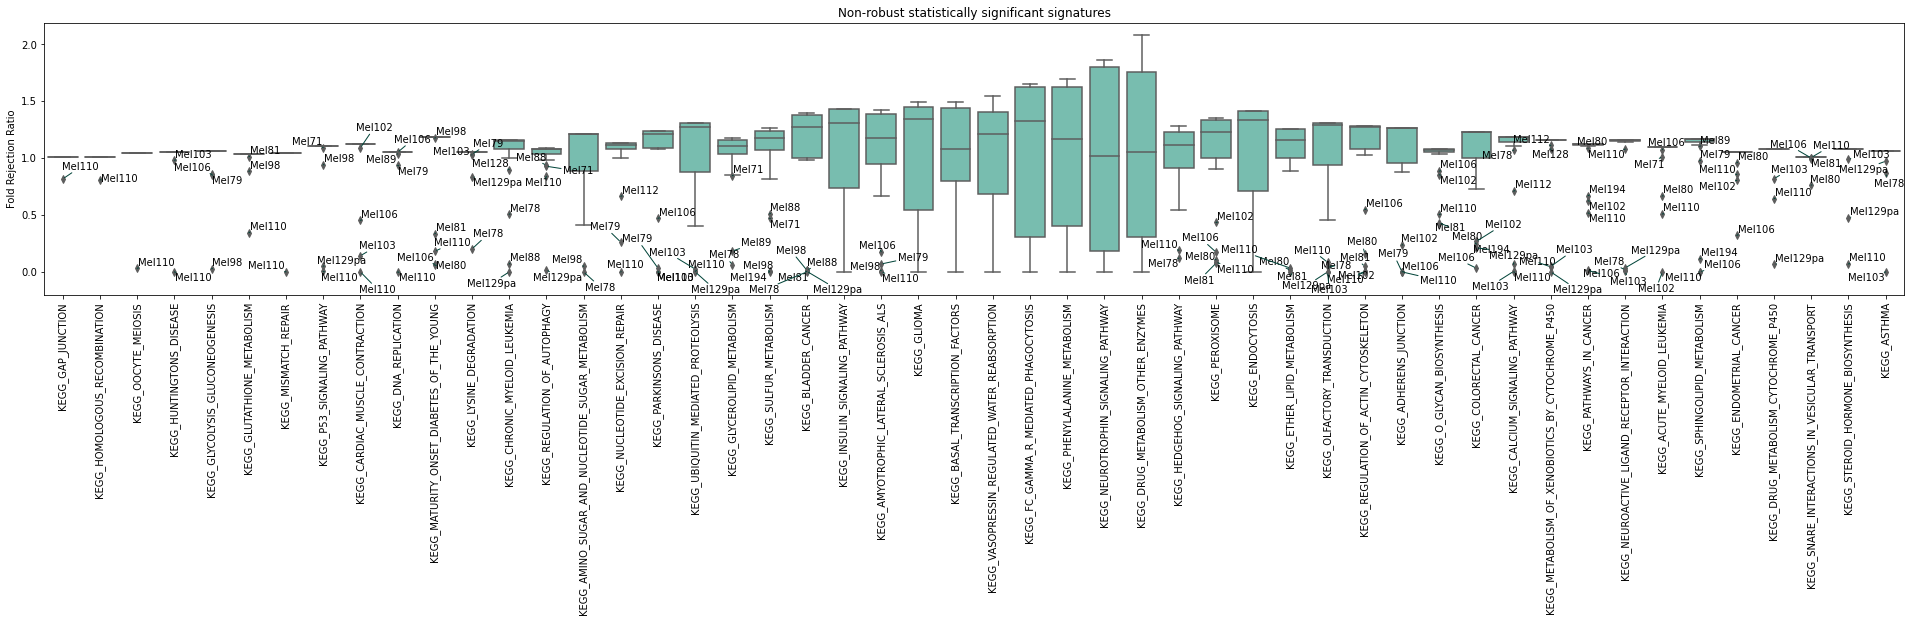

In [6]:
fig, axs = plt.subplots(figsize=(size/1.5,5))

sns.boxplot(data=df_plot.T, color="#6CC9B6",ax=axs)
# sns.swarmplot(data=df_plot.T, color="0.3",ax=axs)

q25 = df_plot.T.quantile(0.25).to_numpy()
q75 = df_plot.T.quantile(0.75).to_numpy()
outlier_top_lim = q75 + 1.5 * (q75 - q25)
outlier_bottom_lim = q25 - 1.5 * (q75 - q25)
texts = []
for i in range(df_plot.shape[0]):
    fr_ratio = df_plot.iloc[i,:]
    pats = [x.split("_")[1] for x in fr_ratio[fr_ratio<outlier_bottom_lim[i]].index.to_list()]
    texts.extend([plt.text(i,fr_ratio[fr_ratio<outlier_bottom_lim[i]][j],pats[j],ha='center', va='center') for j in range(len(pats))])
plt.title("Non-robust statistically significant signatures")
plt.ylabel("Fold Rejection Ratio")
plt.xticks(rotation=90);
plt.ylim(bottom=-0.2)
adjust_text(texts,arrowprops=dict(arrowstyle='-',color='#014439'));